# Analysis of Amazon Alexa Products text reviews #

* Neural Network will be used as a classifier as positive or negative based on the products text reviews. Dataframe from kaggle: www.kaggle.com/sid321axn/amazon-alexa-reviews

In [1]:
########### Basic Data Handling Import Set ###########
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Load ##

In [2]:
# Load Data as Pandas Dataframe:
alexa_reviews_df = pd.read_csv('amazon-alexa.tsv', sep = '\t')
print(alexa_reviews_df.keys())
alexa_reviews_df

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')


,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


## Data Visualization ##

In [3]:
positive_feedback = alexa_reviews_df[alexa_reviews_df['feedback'] == 1]
negative_feedback = alexa_reviews_df[alexa_reviews_df['feedback'] == 0]

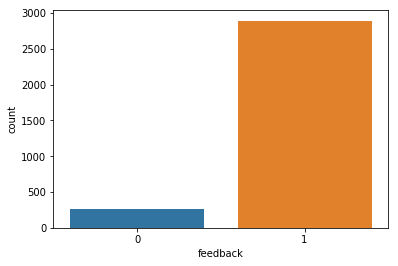

In [4]:
sns.countplot(alexa_reviews_df['feedback'], label = 'Count');

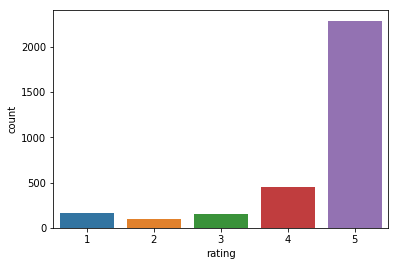

In [5]:
sns.countplot(x = 'rating', data = alexa_reviews_df);

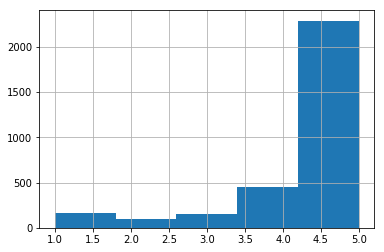

In [6]:
alexa_reviews_df['rating'].hist(bins = 5);

C:\Users\Mafeus\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


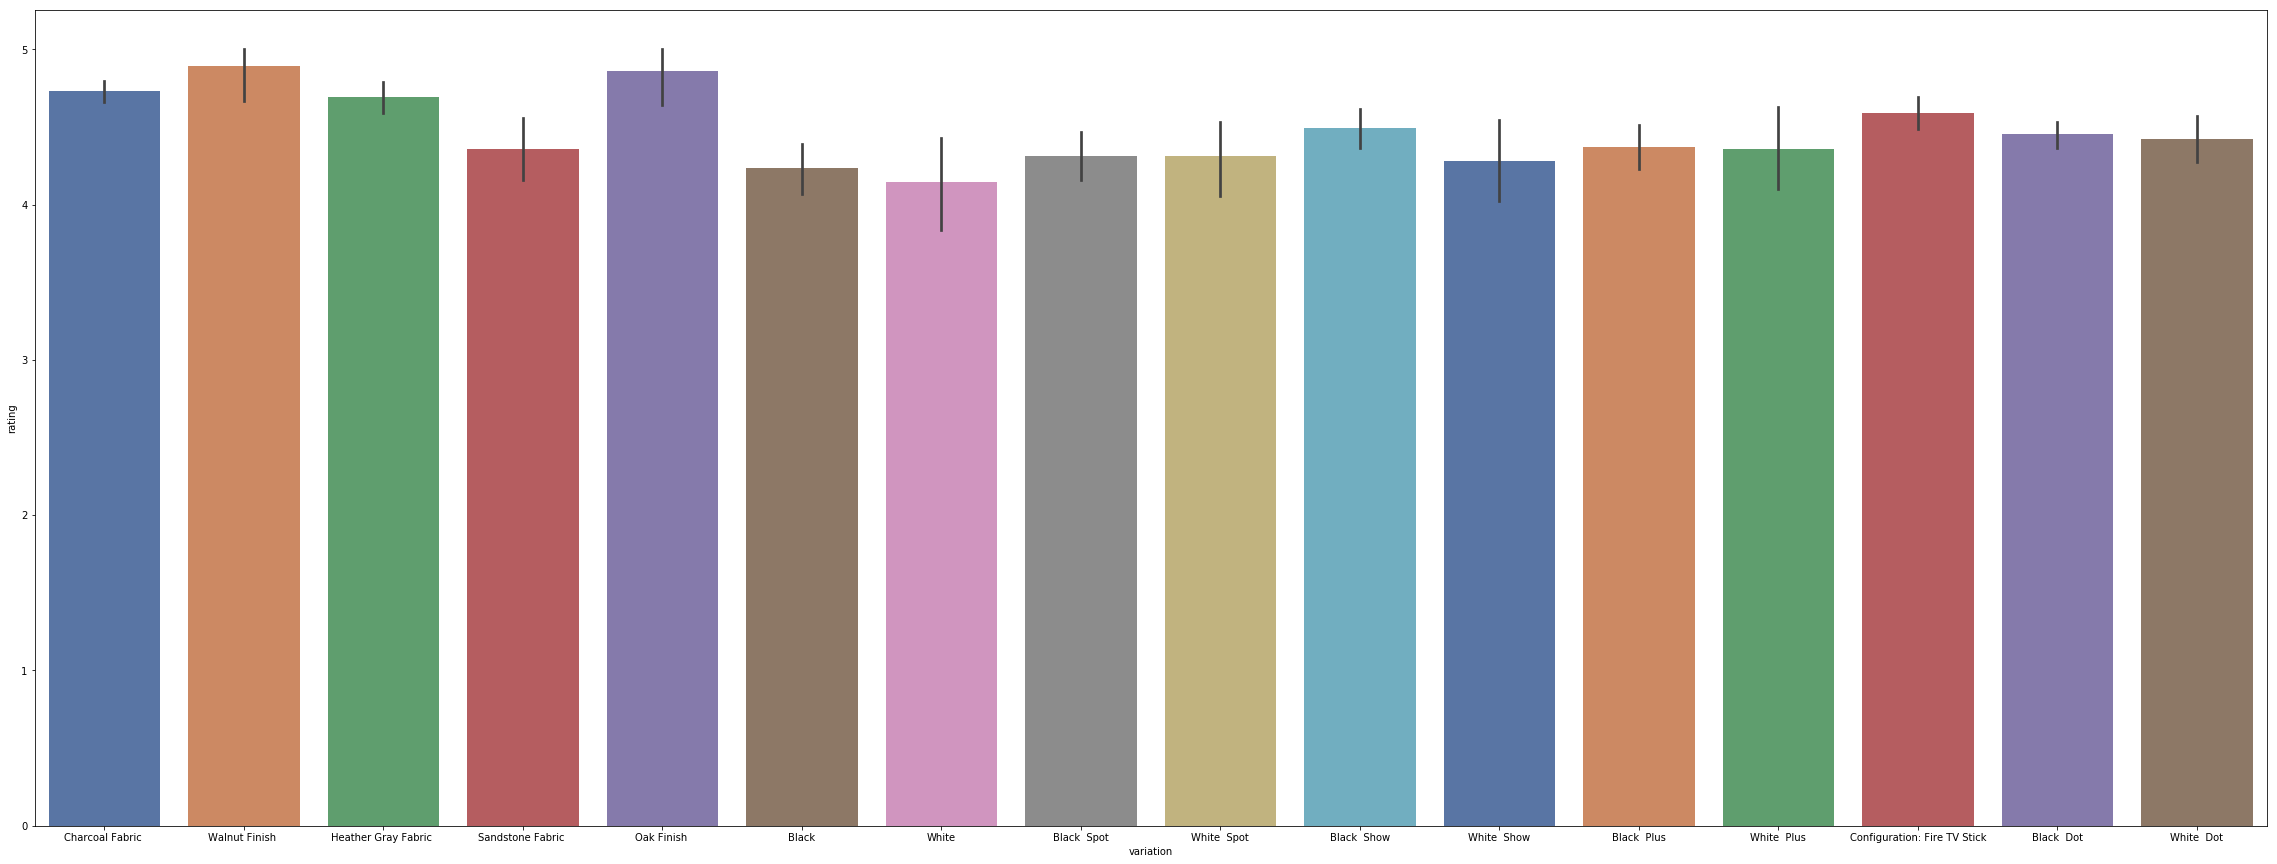

In [7]:
plt.figure(figsize = (40, 15))
sns.barplot(x = 'variation', y = 'rating', data = alexa_reviews_df, palette = 'deep');

## Data Processing ##

In [8]:
alexa_reviews_df = alexa_reviews_df.drop(['date', 'rating'], axis = 1)
alexa_reviews_df

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1
...,...,...,...
3145,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,Black Dot,"Listening to music, searching locations, check...",1
3147,Black Dot,"I do love these things, i have them running my...",1
3148,White Dot,Only complaint I have is that the sound qualit...,1


In [9]:
variation_dummies = pd.get_dummies(alexa_reviews_df['variation'])
variation_dummies

,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [10]:
alexa_reviews_df.drop(['variation'], axis = 1, inplace = True)
alexa_reviews_df = pd.concat([alexa_reviews_df, variation_dummies], axis = 1)
alexa_reviews_df

,verified_reviews,feedback,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Music,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,"Listening to music, searching locations, check...",1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,"I do love these things, i have them running my...",1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,Only complaint I have is that the sound qualit...,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


## Text Token ##

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
stop_words = ['that','this', 'of', 'on', 'the', 'than']
vectorizer = CountVectorizer(stop_words = stop_words)
alexa_reviews_countvectorizer = vectorizer.fit_transform(alexa_reviews_df['verified_reviews'])
print(alexa_reviews_countvectorizer.shape)
print(vectorizer.get_feature_names())

C:\Users\Mafeus\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):


(3150, 4038)
['00', '000', '07', '10', '100', '100x', '11', '1100sf', '12', '129', '12am', '15', '150', '18', '19', '1964', '1990', '1gb', '1rst', '1st', '20', '200', '2000', '2017', '229', '23', '24', '25', '29', '2nd', '2package', '30', '300', '30pm', '34', '360', '39', '3rd', '3x', '3xs', '40', '45', '48', '4am', '4ghz', '4k', '4th', '50', '54', '5am', '5ghz', '5th', '600', '62', '672', '6th', '70', '75', '79', '80', '80s', '81', '83', '85', '88', '888', '8gb', '90', '91', '911', '99', '_specifically_', 'a1', 'a19', 'abay', 'abc', 'abd', 'abilities', 'ability', 'able', 'abode', 'about', 'above', 'absolutely', 'absolutly', 'ac', 'accent', 'acceptable', 'accepting', 'access', 'accessable', 'accessible', 'accessing', 'accessories', 'accesss', 'accident', 'accidentally', 'accompanying', 'accomplish', 'accomplished', 'according', 'accordingly', 'account', 'accounts', 'accuracy', 'accurate', 'accurately', 'accustom', 'acknowledge', 'acoustical', 'across', 'act', 'acting', 'action', 'actio

In [12]:
print(alexa_reviews_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [13]:
alexa_reviews_df.drop(['verified_reviews'], axis = 1, inplace = True)
alexa_reviews_df

,feedback,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [14]:
reviews = pd.DataFrame(alexa_reviews_countvectorizer.toarray())
reviews

,0,1,2,3,4,5,6,7,8,9,...,4028,4029,4030,4031,4032,4033,4034,4035,4036,4037
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
alexa_reviews_df = pd.concat([alexa_reviews_df, reviews], axis = 1)
alexa_reviews_df

,feedback,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,...,4028,4029,4030,4031,4032,4033,4034,4035,4036,4037
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
X = alexa_reviews_df.drop(['feedback'], axis = 1)
Y = alexa_reviews_df['feedback']

## Train and Test Data Preparation and Separation ##

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5) # 80% train, 20% test
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2520, 4054)
(630, 4054)
(2520,)
(630,)


## Tensorflow - Neural Network Setup ##

In [18]:
########### Tensorflow Import ###########

# ON CONDA: pip install tensorflow==2.0.0-alpha0 # If any problem -> pip uninstall numpy -> pip install numpy
import tensorflow as tf

C:\Users\Mafeus\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Mafeus\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Mafeus\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Mafeus\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: P

In [19]:
# Network Setup
classifier = tf.keras.models.Sequential()

# model.add(tf.keras.layers.Dense(units = number of hidden layer neurons, input_shape = [number of input layer neuron]))
classifier.add(tf.keras.layers.Dense(units = 500, activation = 'relu', input_shape = [4054,]))
classifier.add(tf.keras.layers.Dense(units = 500, activation = 'relu'))
classifier.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid')) # Classification, using 'sigmoid' as activation
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               2027500   
_________________________________________________________________
dense_1 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 501       
Total params: 2,278,501
Trainable params: 2,278,501
Non-trainable params: 0
_________________________________________________________________


In [20]:
epochs = 15

classifier.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
epochs_hist = classifier.fit(X_train, Y_train, epochs = epochs)

Epoch 1/15
2520/2520 [==============================] - 5s 2ms/sample - loss: 0.2511 - accuracy: 0.9242
Epoch 2/15
2520/2520 [==============================] - 2s 718us/sample - loss: 0.0685 - accuracy: 0.9754
Epoch 3/15
2520/2520 [==============================] - 2s 734us/sample - loss: 0.0244 - accuracy: 0.9917
Epoch 4/15
2520/2520 [==============================] - 2s 718us/sample - loss: 0.0179 - accuracy: 0.9948
Epoch 5/15
2520/2520 [==============================] - 2s 728us/sample - loss: 0.0165 - accuracy: 0.9937
Epoch 6/15
2520/2520 [==============================] - 2s 701us/sample - loss: 0.0167 - accuracy: 0.9937
Epoch 7/15
2520/2520 [==============================] - 2s 718us/sample - loss: 0.0160 - accuracy: 0.9940
Epoch 8/15
2520/2520 [==============================] - 2s 721us/sample - loss: 0.0159 - accuracy: 0.9933
Epoch 9/15
2520/2520 [==============================] - 2s 714us/sample - loss: 0.0152 - accuracy: 0.9948
Epoch 10/15
2520/2520 [=========================

## Model Error Metrics and Results ##

In [21]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy'])

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

[[ 188   10]
 [   3 2319]]


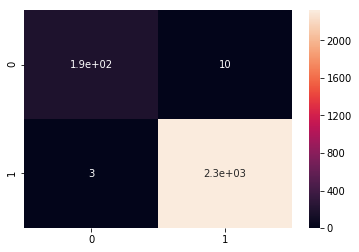

In [23]:
y_pred_train = classifier.predict(X_train)
y_pred_train = (y_pred_train > 0.5)
cm = confusion_matrix(Y_train, y_pred_train)
print(cm)
sns.heatmap(cm, annot = True);

[[ 18  41]
 [  7 564]]


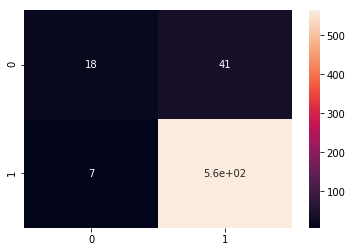

In [24]:
y_pred_test = classifier.predict(X_test)
y_pred_test = (y_pred_test > 0.5)
cm = confusion_matrix(Y_test, y_pred_test)
print(cm)
sns.heatmap(cm, annot = True);

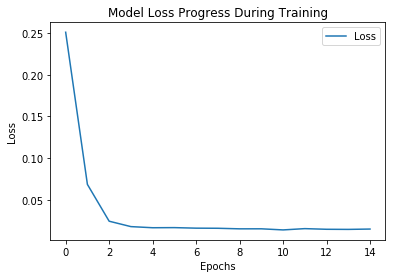

In [25]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')  
plt.legend(['Loss'])

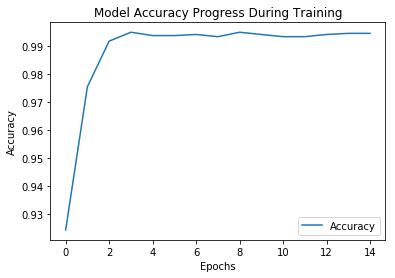

In [26]:
plt.plot(epochs_hist.history['accuracy'])
plt.title('Model Accuracy Progress During Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')  
plt.legend(['Accuracy'])

In [28]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.72      0.31      0.43        59
           1       0.93      0.99      0.96       571

   micro avg       0.92      0.92      0.92       630
   macro avg       0.83      0.65      0.69       630
weighted avg       0.91      0.92      0.91       630

